In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_csv(main_dir + 'schemaBasedAnalysisCleanFinalTimes.csv', sep='|')
df

,Dataset,Attribute Name,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,Average Characters D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,Name,Cosine Similarity,Scarce,2210,Restaurants,11,2,0.67,11,...,0.978,0.845,0.50,5,0.739,0.955,0.833,0.60,2,Right
1,Restaurants,Name,Damerau Levenshtein,Scarce,292737,Restaurants,11,2,0.67,11,...,0.787,0.787,0.80,36,0.787,0.787,0.787,0.80,9,Right
2,Restaurants,Name,Euclidean Distance,Scarce,286463,Restaurants,11,2,0.67,11,...,0.910,0.835,0.65,19,0.730,0.910,0.810,0.60,11,Right
3,Restaurants,Name,Generalized Jaccard,Scarce,2210,Restaurants,11,2,0.67,11,...,0.966,0.835,0.25,2,0.730,0.944,0.824,0.40,2,Right
4,Restaurants,Name,Jaro Similarity,Scarce,318143,Restaurants,11,2,0.67,11,...,0.899,0.821,0.80,21,0.736,0.910,0.814,0.80,4,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Movies,Title,Overlap Coefficient,Balanced,18961432,Movies,18,3,1.00,24,...,0.395,0.542,0.55,1364,0.780,0.415,0.542,0.55,257,Right
203,Movies,Title,q-grams Distance,Balanced,76181835,Movies,18,3,1.00,24,...,0.513,0.655,0.25,5129,0.878,0.515,0.649,0.35,777,Right
204,Movies,Title,Simon White,Balanced,155889165,Movies,18,3,1.00,24,...,0.518,0.660,0.40,9035,0.896,0.521,0.659,0.50,1535,Right
205,Movies,Title,Longest Common Subsequence,Balanced,373359861,Movies,18,3,1.00,24,...,0.463,0.601,0.10,546861,0.761,0.469,0.580,0.40,5135,Right


In [2]:
runtimes = pd.DataFrame()
runtimes['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Run-time')):
#         if (column.find('BAH') < 0):
        runtimes[column] = df[column]

runtimes.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes

,Dataset,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
0,Restaurants,5,10,10,1881,5,3,5,2
1,Restaurants,4,12,8,1902,13,8,36,9
2,Restaurants,5,7,7,1861,20,15,19,11
3,Restaurants,1,2,4,1866,2,2,2,2
4,Restaurants,3,16,6,1883,3,4,21,4
...,...,...,...,...,...,...,...,...,...
202,Movies,184,1085,20364,124879,181,209,1364,257
203,Movies,501,1765,19911,124285,589,514,5129,777
204,Movies,1003,1943,20947,124677,1045,1002,9035,1535
205,Movies,2373,3664,22472,127266,2646,2445,546861,5135


In [4]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

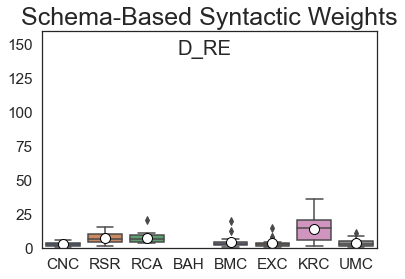

In [6]:
dataset_df = runtimes[runtimes['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
plt.ylim(0, 160)
plt.suptitle('D_RE',  y=0.85)
plt.savefig(main_dir + 'sbsyD1RT.eps', format='eps')

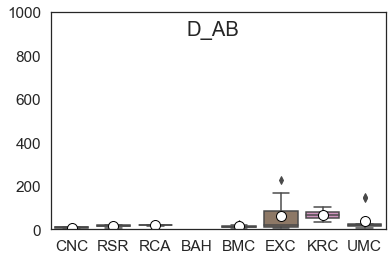

In [7]:
dataset_df = runtimes[runtimes['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AB',  y=0.85)
plt.ylim(0, 1000)
plt.savefig(main_dir + 'sbsyD2RT.eps', format='eps')

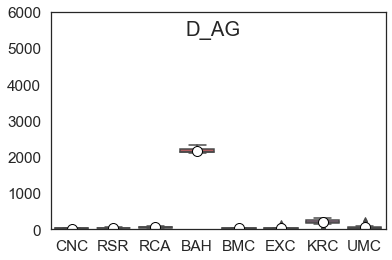

In [9]:
dataset_df = runtimes[runtimes['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AG',  y=0.85)
plt.ylim(0, 6000)
plt.savefig(main_dir + 'sbsyD3RT.eps', format='eps')

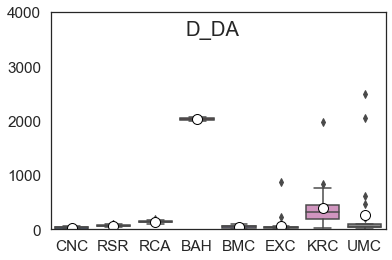

In [10]:
dataset_df = runtimes[runtimes['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DA',  y=0.85)
plt.ylim(0, 4000)
plt.savefig(main_dir + 'sbsyD4RT.eps', format='eps')

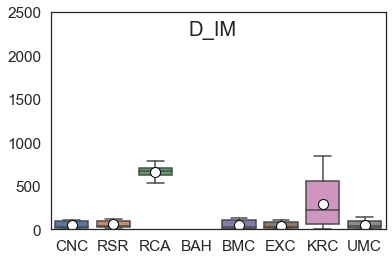

In [13]:
dataset_df = runtimes[runtimes['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_IM',  y=0.85)
plt.ylim(0, 2500)
plt.savefig(main_dir + 'sbsyD5RT.eps', format='eps')

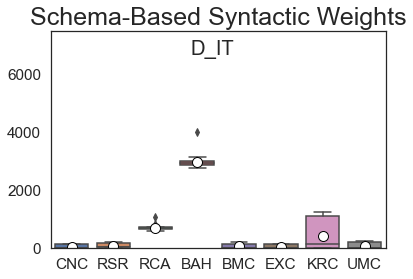

In [14]:
dataset_df = runtimes[runtimes['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
plt.suptitle('D_IT',  y=0.85)
plt.ylim(0, 7500)
plt.savefig(main_dir + 'sbsyD6RT.eps', format='eps')

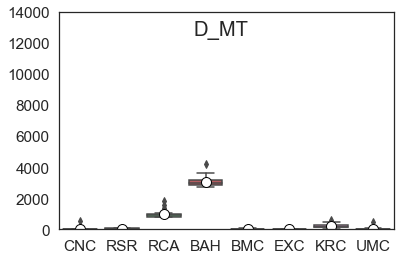

In [15]:
dataset_df = runtimes[runtimes['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_MT',  y=0.85)
plt.ylim(0, 14000)
plt.savefig(main_dir + 'sbsyD7RT.eps', format='eps')

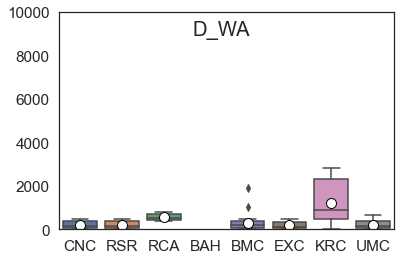

In [17]:
dataset_df = runtimes[runtimes['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_WA',  y=0.85)
plt.ylim(0, 10000)
plt.savefig(main_dir + 'sbsyD8RT.eps', format='eps')

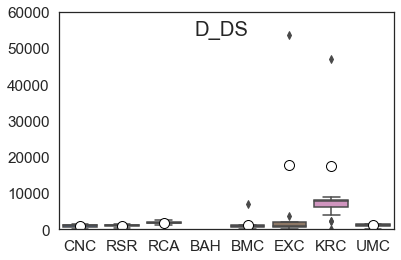

In [18]:
dataset_df = runtimes[runtimes['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DS',  y=0.85)
plt.ylim(0, 60000)
plt.savefig(main_dir + 'sbsyD9RT.eps', format='eps')

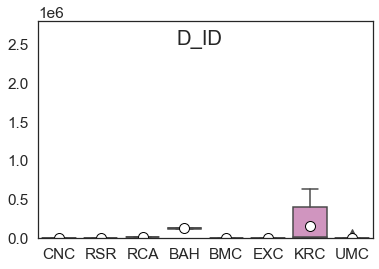

In [19]:
dataset_df = runtimes[runtimes['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_ID',  y=0.85)
plt.ylim(0, 2800000)
plt.savefig(main_dir + 'sbsyD10RT.eps', format='eps')